# 검색광고 데이터 분석


### 데이터 출처 : 컴퓨터 관련 전문 온라인 강의를 제공하는 P사의 오픈데이터

# <데이터 소개>

- 컴퓨터 관련 전문 온라인 강의를 제공하는 P사의 키워드 광고데이터

- P사가 온라인 광고를 진행하는 데 사용한 네이버, 구글, 페이스북의 광고관리시스템의 데이터를 종합한 것

In [173]:
import pandas as pd

# < Variables >

- 광고그룹 : 광고대상에 해당하는 강의명
- 키워드 : 광고 노출 키워드 
- 노출수 : 특정 기간(2019.02.01~ 2019.04.03) 동안 광고 노출 횟수
- 클릭수 : 특정 기간(2019.02.01~ 2019.04.03) 동안 해당 광고를 클릭한 횟수
- 클릭률 : 클릭수/노출수*100
- 총비용 : 특정 기간(2019.02.01~ 2019.04.03) 동안 해당 광고를 진행하는 데 든 총 비용
- 평균클릭비용 : 총비용/클릭수


### 데이터로드

In [174]:
ad_df= pd.read_excel("캠페인보고서.xls")
ad_df

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
...,...,...,...,...,...,...,...
1377,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0,0,0,0
1378,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0,0,0,0
1379,마케팅KPI수립,LTV,32602,0,0,0,0
1380,data_camp_rmp_8,DECISION,60844,0,0,0,0



## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 탐색적 데이터 분석(EDA)
3. 데이터분석
4. 결과해석 

### 1.데이터 전처리

#### 첫번째 행 제거

In [175]:
ad_df= pd.read_excel("캠페인보고서.xls",skiprows=[0])
ad_df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


#### 결측치확인

In [176]:
ad_df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

#### 클릭수 1의자리로 변환

In [177]:
ad_df["클릭수"] = ad_df["클릭수"].round(0).astype(int)
ad_df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.59,1175174
4,3. html,HTML,9626374,814,0.01,1408.44,1145903


#### 클릭률 = 클릭수/노출수*100
 - 클릭수가 변경되어 클릭률 또한 변경필요

In [178]:
ad_df["클릭률(%)"] = ad_df["클릭수"]/ad_df["노출수"]*100
ad_df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.59,1175174
4,3. html,HTML,9626374,814,0.01,1408.44,1145903


#### 평균클릭비용(VAT포함,원) 1의자리수 변환

In [179]:
ad_df["평균클릭비용(VAT포함,원)"] = ad_df["평균클릭비용(VAT포함,원)"].round(0).astype(int)
ad_df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903


### 2.탐색적 데이터분석(EDA)

#### 데이터구조 파악

In [180]:
ad_df.shape

(1381, 7)

#### 기술통계량

In [181]:
#pandas 출력옵션 설정
pd.set_option('display.float_format', '{:.2f}'.format) 
ad_df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.50,0.35,981.62,37919.58
std,296465.03,387.51,1.00,1372.40,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.00,0.01,64.00,77.00
50%,3805.00,4.00,0.06,396.00,2123.00
75%,10734.00,14.00,0.24,1303.00,17435.00
max,9626374.00,9606.00,13.59,9363.00,2512444.00


#### 범주형변수 빈도파악

In [182]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [183]:
ad_group = ad_df["광고그룹"].value_counts()
ad_group

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
1. 전체                            26
                                 ..
올인원 패키지 : 영상 제작/편집_5.일러스트         1
프론트엔드 개발 스쿨 12기_기존 키워드            1
올인원 패키지 : 콘텐츠 마케팅_콘텐츠 제작          1
UX 디자인 실전                         1
자율주행 연구를 위한 ROS·SLAM Workshop     1
Name: 광고그룹, Length: 186, dtype: int64

In [184]:
ad_keyword= ad_df["키워드"].value_counts()
ad_keyword

-            8
구글광고         5
포토샵          5
GUI          5
마케팅분석        4
            ..
파이썬연산자       1
리눅스서버        1
인사부          1
게임만드는프로그램    1
DECISION     1
Name: 키워드, Length: 1112, dtype: int64

#### 상관관계

In [185]:
ad_df.corr()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
노출수,1.00,0.26,-0.02,0.02,0.43
클릭수,0.26,1.00,0.25,-0.03,0.77
클릭률(%),-0.02,0.25,1.00,0.10,0.25
"평균클릭비용(VAT포함,원)",0.02,-0.03,0.10,1.00,0.28
"총비용(VAT포함,원)",0.43,0.77,0.25,0.28,1.00


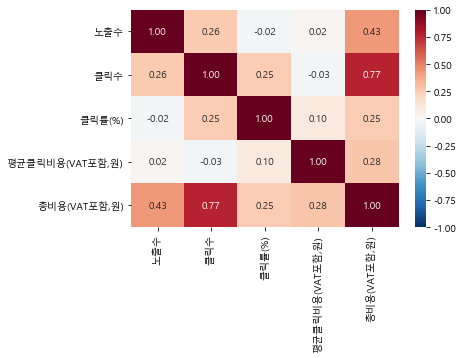

In [186]:
sns.heatmap(ad_df.corr(),
              annot = True, 
            fmt = '.2f',# 실제 값 화면에 나타내기
               cmap = 'RdBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

#### 시각화

 - 노출수

{'whiskers': [<matplotlib.lines.Line2D at 0x23b1ca9ad08>,
 'caps': [<matplotlib.lines.Line2D at 0x23b1ca9ae88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b1ca8fd08>],
 'medians': [<matplotlib.lines.Line2D at 0x23b1ca9db08>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b1ca70fc8>],
 'means': []}

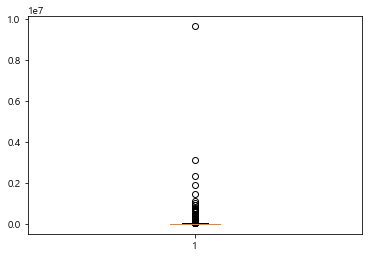

In [187]:
plt.boxplot(ad_df["노출수"])

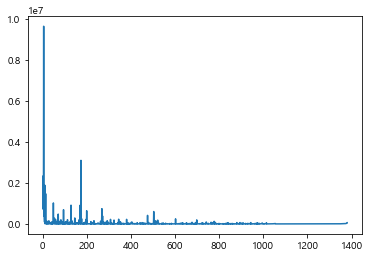

In [188]:
ad_df["노출수"].plot()

In [189]:
imp_sort = ad_df["노출수"].sort_values()
imp_sort=imp_sort.reset_index()
imp_sort.drop("index",axis=1,inplace=True)

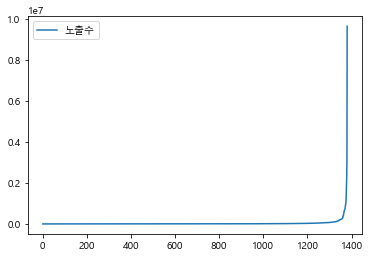

In [190]:
imp_sort.plot()

상위 n% 그룹의 노출수가 압도적으로 높은것을 확인

 - 클릭수

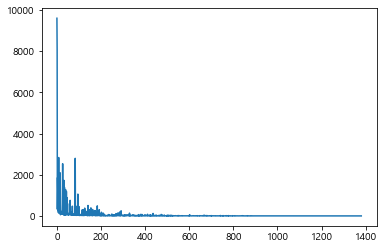

In [191]:
ad_df["클릭수"].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x23b1cc25d08>,
 'caps': [<matplotlib.lines.Line2D at 0x23b1cc29cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b1cc1aa08>],
 'medians': [<matplotlib.lines.Line2D at 0x23b1cc2ec48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b1cc2ed48>],
 'means': []}

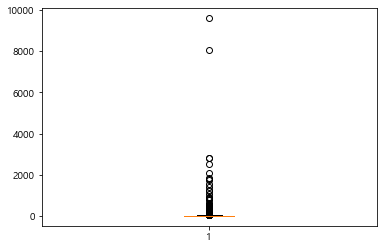

In [192]:
plt.boxplot(ad_df["클릭수"])

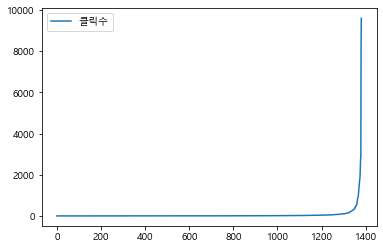

In [193]:
ad_df["클릭수"].sort_values().reset_index().drop("index",axis=1).plot()

상위 n% 그룹의 클릭수가 압도적으로 높은것을 확인

- 총비용(VAT포함,원)

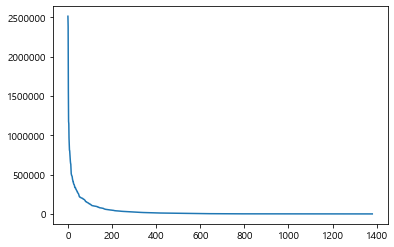

In [194]:
ad_df["총비용(VAT포함,원)"].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x23b1cd1b148>,
 'caps': [<matplotlib.lines.Line2D at 0x23b1cd60fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b1cd59f08>],
 'medians': [<matplotlib.lines.Line2D at 0x23b1cd64f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b1cd6af48>],
 'means': []}

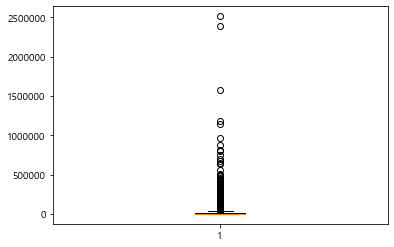

In [195]:
plt.boxplot(ad_df["총비용(VAT포함,원)"])

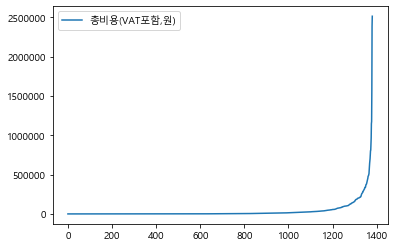

In [196]:
ad_df["총비용(VAT포함,원)"].sort_values().reset_index().drop("index",axis=1).plot()

상위 n% 그룹의 총비용이 압도적으로 높은것을 확인

## 데이터 분석

### 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [197]:
#상위 5%노출수
imp = ad_df["노출수"].quantile(0.95)
imp = ad_df[ad_df["노출수"]>=imp]
ad_df.loc[imp.index,["광고그룹","키워드","노출수"]]

,광고그룹,키워드,노출수
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456
1,올인원 패키지 : 업무자동화_VBA,-,767491
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106
4,3. html,HTML,9626374
...,...,...,...
698,파이낸스 전체,부동산스터디,196862
741,7. 운영체제,가상메모리,94933
763,마케팅 전체,프로모션,82858
777,iOS 개발 스쿨 9기_기존 키워드,앱스토어,126393


In [198]:
#상위 5% 클릭수
click = ad_df["클릭수"].quantile(0.95)
click = ad_df[ad_df["클릭수"]>=click]
ad_df.loc[click.index,["광고그룹","키워드","클릭수"]]

,광고그룹,키워드,클릭수
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,9606
1,올인원 패키지 : 업무자동화_VBA,-,8058
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,324
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,1864
4,3. html,HTML,814
...,...,...,...
281,올인원 패키지 : 투자_파워콘텐츠,재태크,126
286,올인원 패키지 : 업무자동화_VBA,모스자격증,198
291,올인원 패키지 : 투자_파워콘텐츠,펀드하는법,248
329,올인원 패키지 : 투자_파워콘텐츠,채권투자,136


#### 중점관리 키워드= 노출수, 클릭수 모두 상위 5%에 해당하는 키워드로 설정

In [284]:
imp5= ad_df["노출수"].quantile(0.95)
click5 = ad_df["클릭수"].quantile(0.95)
result = ad_df[(ad_df["노출수"]>=imp5) & (ad_df["클릭수"]>=click5)]

In [285]:
result

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903
5,6. 파이썬,파이썬,384522,260,0.07,3705,964876
6,1. 코딩,코딩,562162,271,0.05,3243,879560
7,2. C언어 일반,C언어,271370,154,0.06,5269,809358
8,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838,3.11,283,803770
9,AOP 전체_중복키워드_디자인,포토샵,1887822,394,0.02,1914,753247


In [201]:
#키워드 추출
result["키워드"].values

array(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급',
       '포토샵', '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블',
       '바이럴마케팅'], dtype=object)

해당 키워드가 노출수와 클릭수 기준 상위 키워드에 해당하며 중점적으로 관리해야할 키워드임

### 저효율 키워드추출
 - 노출수 클릭수 기준 상위 5%에 해당하는 키워드가 아님에도 비용이 많이 나가는 키워드

In [296]:
#총비용 기준 상위 5% 키워드추출
cost5= ad_df["총비용(VAT포함,원)"].quantile(0.95)
low_keyword=ad_df[(ad_df["총비용(VAT포함,원)"]>=cost5) & (ad_df["노출수"]<imp5) & (ad_df["클릭수"] < click5)]
low_keyword

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
16,올인원 패키지 : 업무자동화_2. 파이썬,파이썬교육,1226,56,4.57,8831,498069
20,1. 모바일앱개발_교육,어플개발,8033,84,1.05,5428,455939
21,올인원 패키지 : UX/UI 디자인 입문_연관검색어,UIUX디자인,9627,119,1.24,3685,437767
23,1. 모바일앱개발_교육,앱개발,23962,103,0.43,3983,411092
24,1. 모바일앱개발_교육,어플제작,6496,79,1.22,5185,410652
28,1. 모바일앱개발_교육,앱제작,4324,79,1.83,4735,375023
31,JavaScript BOOT CAMP,자바스크립트,29305,59,0.20,5744,337766
33,1. 일반_PC,게임학원,6163,36,0.58,9363,337051
36,ㅍAOP 전체_중복키워드_디자인(삭제),영상제작,62542,49,0.08,6432,316448
37,디지털 마케팅 스쿨 13기_대표키워드,SNS마케팅교육,3378,96,2.84,3257,312664


In [203]:
low_keyword = low_keyword["키워드"]
low_keyword.values

array(['파이썬교육', '어플개발', 'UIUX디자인', '앱개발', '어플제작', '앱제작', '자바스크립트', '게임학원',
       '영상제작', 'SNS마케팅교육', '데이터사이언스', '파이썬강좌', '구글광고', '마케팅교육', '어플만들기',
       '업무자동화', '브랜딩', '브랜딩', '상세페이지제작', '데이터사이언스', '포토샵강좌', '코딩프로그램',
       'UIUX디자인', 'SNS마케팅교육', '자료구조', '브랜드네이밍', '인터넷쇼핑몰창업', '온라인쇼핑몰창업',
       '엑셀강의', '온라인마케팅교육', '파이썬강의'], dtype=object)

해당 키워드들은 노출수와 클릭수가 높지 않음에도 비용이 많은 키워드들로 개선이 필요함

### 광고그룹을 기준으로 데이터분석 진행

In [204]:
group_ad = ad_df.groupby("광고그룹")

In [205]:
#그룹별 개수
group_ad.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [206]:
#그룹별 평균
group_ad.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.35,0.18,625.06,7243.96
001.BASIC DESIGN,5738.56,6.67,0.23,298.67,2427.33
001.데이터분석/ 통계,3715.00,20.20,0.89,1021.70,19575.60
002.R,13413.78,8.67,0.11,360.00,4796.00
002.UX/UI,3090.80,4.00,0.08,70.00,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.77,0.05,648.38,15781.62
프로그래밍 유치원,5921.62,7.75,0.23,2032.50,23617.00
프로그래밍 전체,90375.00,9.17,0.02,123.92,1626.17


In [207]:
#그룹별 중간값
group_ad.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,4.00,0.05,766.00,2458.50
001.BASIC DESIGN,5524.00,2.00,0.03,358.00,1023.00
001.데이터분석/ 통계,1813.00,13.50,0.57,1097.00,13464.00
002.R,5184.00,4.00,0.03,119.00,1287.00
002.UX/UI,2649.00,1.00,0.08,73.00,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,4.00,0.02,853.00,2706.00
프로그래밍 유치원,3748.00,3.00,0.11,1764.00,8002.50
프로그래밍 전체,3455.50,1.00,0.01,130.50,225.50


In [208]:
#그룹별 표준편사
group_ad.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.70,0.32,472.81,15854.71
001.BASIC DESIGN,4182.62,9.10,0.46,176.19,3220.04
001.데이터분석/ 통계,4109.84,18.30,0.82,269.78,19127.40
002.R,19333.63,14.76,0.17,371.79,10077.59
002.UX/UI,1996.65,7.31,0.11,69.27,1005.28
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.58,35.38,0.07,470.90,37543.64
프로그래밍 유치원,6642.34,9.87,0.26,1649.54,37088.92
프로그래밍 전체,200385.15,17.26,0.03,120.05,2801.70


### 광고그룹기준 전처리진행

In [209]:
group_ad = group_ad.sum()

In [210]:
group_ad

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,8.83,30003,347710
001.BASIC DESIGN,51647,60,2.04,2688,21846
001.데이터분석/ 통계,37150,202,8.89,10217,195756
002.R,120724,78,1.03,3240,43164
002.UX/UI,15454,20,0.42,350,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.69,8429,205161
프로그래밍 유치원,47373,62,1.84,16260,188936
프로그래밍 전체,1084500,110,0.26,1487,19514


#### 클릭률 , 평균클릭비용에대해 재계산필요

In [211]:
#클릭률 = 클릭수 / 노출수
#평균클릭비용 = 총비용 / 클릭수
group_ad["클릭률(%)"] = group_ad["클릭수"]/group_ad["노출수"]
group_ad["평균클릭비용(VAT포함,원)"] = group_ad["총비용(VAT포함,원)"] / group_ad["클릭수"]

In [212]:
group_ad

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.00,867.11,347710
001.BASIC DESIGN,51647,60,0.00,364.10,21846
001.데이터분석/ 통계,37150,202,0.01,969.09,195756
002.R,120724,78,0.00,553.38,43164
002.UX/UI,15454,20,0.00,137.50,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.00,941.11,205161
프로그래밍 유치원,47373,62,0.00,3047.35,188936
프로그래밍 전체,1084500,110,0.00,177.40,19514


#### 결측치확인 및 처리

In [213]:
group_ad.isna().sum()

노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    5
총비용(VAT포함,원)       0
dtype: int64

In [214]:
group_ad[group_ad["평균클릭비용(VAT포함,원)"].isna()==True]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0,0.00,nan,0
fin_camp_business_4,2136,0,0.00,nan,0
fin_camp_rfs_9,1928,0,0.00,nan,0
다함께 DDD 프로젝트,3689,0,0.00,nan,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0,0.00,nan,0


In [215]:
#결측치제거
group_ad = group_ad.dropna(axis=0)

In [216]:
#평균클릭비용(VAT포함,원) 반올림처리
group_ad["평균클릭비용(VAT포함,원)"] = group_ad["평균클릭비용(VAT포함,원)"].round(0).astype(int)
group_ad

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.00,867,347710
001.BASIC DESIGN,51647,60,0.00,364,21846
001.데이터분석/ 통계,37150,202,0.01,969,195756
002.R,120724,78,0.00,553,43164
002.UX/UI,15454,20,0.00,138,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.00,941,205161
프로그래밍 유치원,47373,62,0.00,3047,188936
프로그래밍 전체,1084500,110,0.00,177,19514


### 데이터시각화

 - 그룹별 노출수

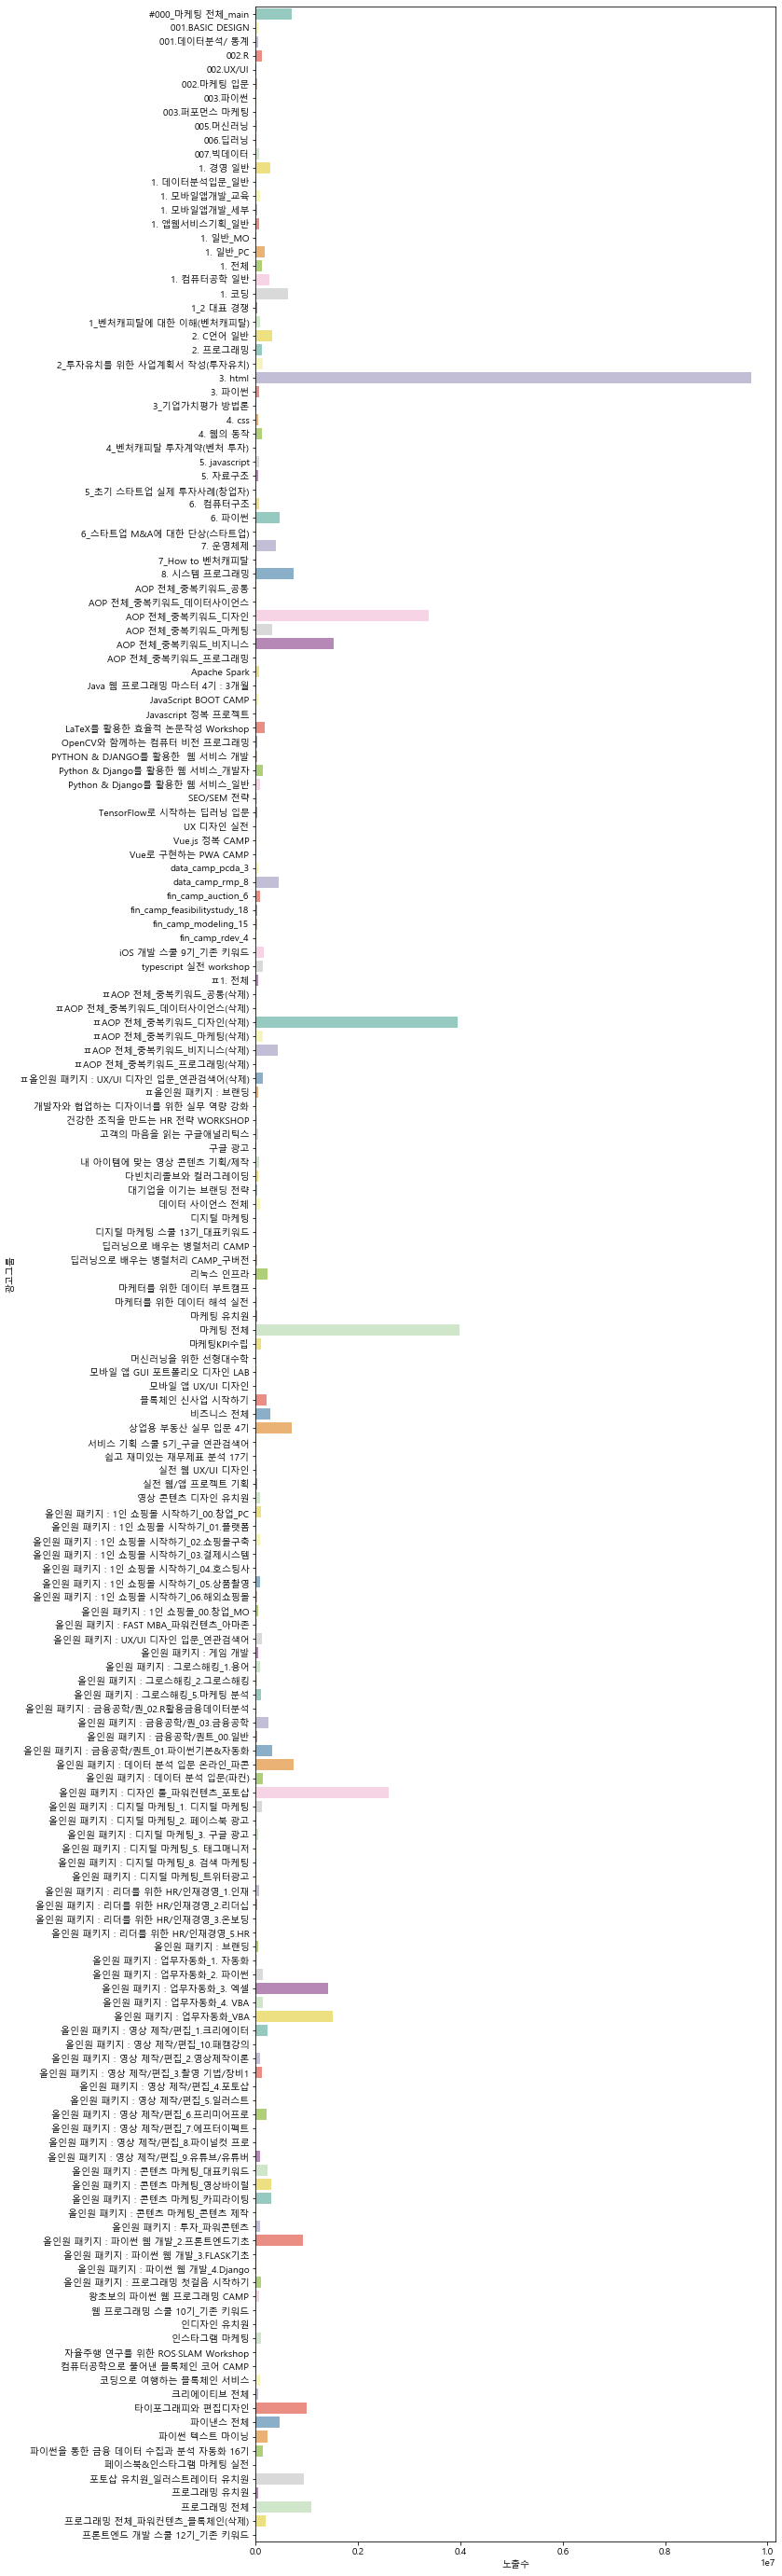

In [155]:
fig = plt.figure(figsize=(10,50))
sns.barplot(group_ad["노출수"],group_ad.index,palette= "Set3")

- 그룹별 클릭수

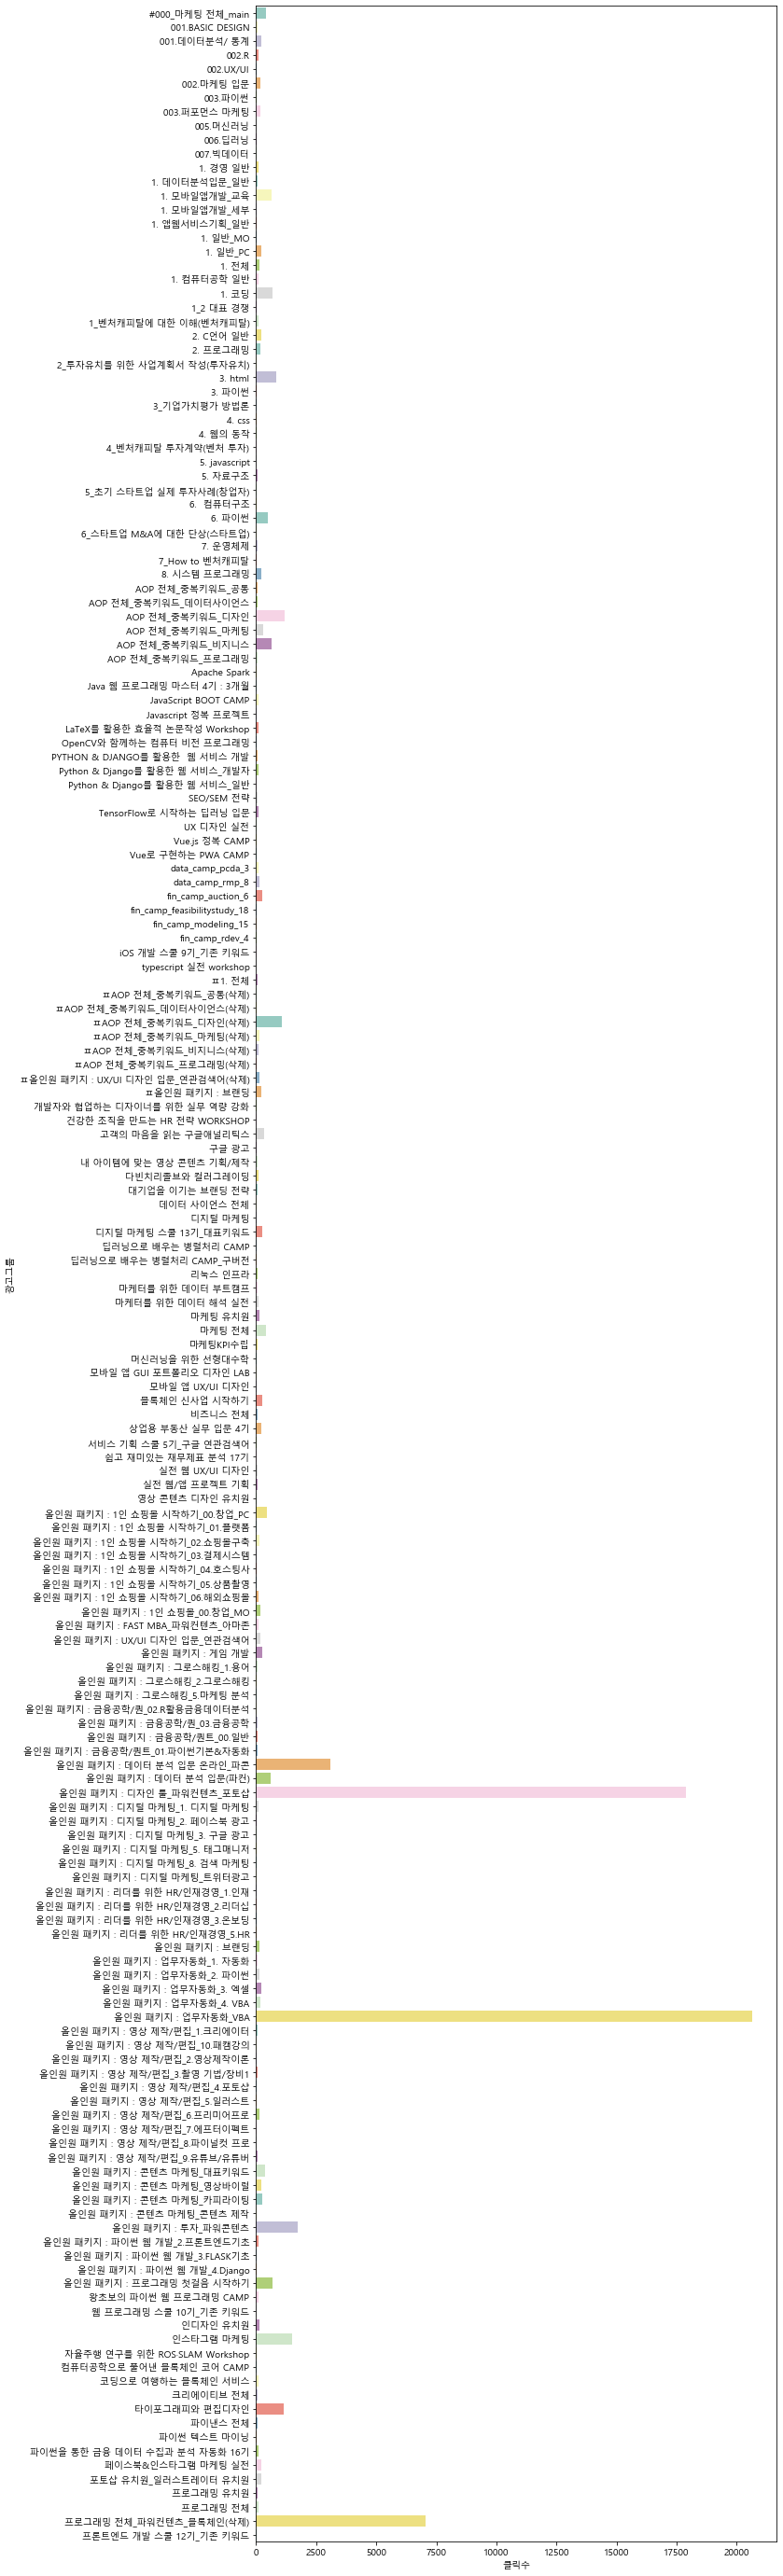

In [156]:
fig = plt.figure(figsize=(10,50))
sns.barplot(group_ad["클릭수"],group_ad.index,palette="Set3")

#### 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
 
 상위10%(노출수,클릭수 기준 90백분위수 이상)

In [218]:
imp = group_ad["노출수"]
imp10 = group_ad["노출수"].quantile(0.9)
click = group_ad["클릭수"]
click10 = group_ad["클릭수"].quantile(0.9)

In [219]:
result2 =group_ad[(imp>=imp10) & (click>=click10)]
result2

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.00,867,347710
1. 코딩,630038,671,0.00,2498,1676125
3. html,9683503,829,0.00,1389,1151601
6. 파이썬,465292,488,0.00,3195,1559107
AOP 전체_중복키워드_디자인,3388256,1176,0.00,2118,2490708
AOP 전체_중복키워드_비지니스,1528568,636,0.00,1759,1118678
ㅍAOP 전체_중복키워드_디자인(삭제),3936637,1050,0.00,2564,2692591
마케팅 전체,3984480,421,0.00,227,95546
올인원 패키지 : 데이터 분석 입문 온라인_파콘,742689,3079,0.00,524,1614151


In [220]:
result2.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인'],
      dtype='object', name='광고그룹')

해당 광고그룹들은 노출수 클릭수가 높은 그룹들로 마케팅시 적극활용을 권장

- 저효율 광고그룹 : 
 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹

In [221]:
cost = group_ad["총비용(VAT포함,원)"]
cost10 = cost.quantile(0.9)
result3 = group_ad[(click<click10) & (imp<imp10) & (cost>=cost10)]
result3

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
1. 일반_PC,177032,207,0.00,5651,1169718
2. C언어 일반,309996,229,0.00,4684,1072544
AOP 전체_중복키워드_마케팅,316698,295,0.00,2336,689095
디지털 마케팅 스쿨 13기_대표키워드,16638,250,0.02,4129,1032306
블록체인 신사업 시작하기,205145,255,0.00,2612,666105
올인원 패키지 : 업무자동화_2. 파이썬,137351,137,0.00,5704,781385


In [222]:
result3.index

Index(['1. 일반_PC', '2. C언어 일반', 'AOP 전체_중복키워드_마케팅', '디지털 마케팅 스쿨 13기_대표키워드',
       '블록체인 신사업 시작하기', '올인원 패키지 : 업무자동화_2. 파이썬'],
      dtype='object', name='광고그룹')

해당 그룹광고들은 노출수,클릭수에 비해 비용이 많이드는 그룹들로 개선이필요한 그룹임

### 4. 결과해석 

In [291]:
#중점관리 광고그룹 중 중점관리 키워드도 가지는 광고그룹을 따로분류
group_list = [value for value in result["광고그룹"] if value in result2.index]
result.index = result["광고그룹"]
important_ad_df = result.loc[group_list,:].drop("광고그룹",axis=1)

In [292]:
important_ad_df

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,포토샵,124068,2536,2.04,150,381359
올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
올인원 패키지 : 업무자동화_VBA,컴퓨터활용능력,139729,1535,1.10,239,367147
올인원 패키지 : 업무자동화_VBA,컴퓨터활용능력2급,88751,1283,1.45,234,300058
올인원 패키지 : 업무자동화_VBA,컴퓨터활용능력1급,94757,1192,1.26,237,282018
ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
ㅍAOP 전체_중복키워드_디자인(삭제),포토샵,1021846,157,0.02,1625,255475
ㅍAOP 전체_중복키워드_디자인(삭제),마블,907619,228,0.03,265,60533


In [304]:
#저효율 광고그룹 중 저효율 키워드도 가지는 광고그룹을 따로분류
group_list2 = [value for value in low_keyword["광고그룹"] if value in result3.index]
low_keyword.index = low_keyword["광고그룹"]
cost_ad_df = low_keyword.loc[group_list2,:].drop("광고그룹",axis=1)

In [305]:
cost_ad_df

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
올인원 패키지 : 업무자동화_2. 파이썬,파이썬교육,1226,56,4.57,8831,498069
올인원 패키지 : 업무자동화_2. 파이썬,파이썬강의,1405,40,2.85,4755,188287
1. 일반_PC,게임학원,6163,36,0.58,9363,337051
디지털 마케팅 스쿨 13기_대표키워드,SNS마케팅교육,3378,96,2.84,3257,312664
올인원 패키지 : 업무자동화_2. 파이썬,파이썬교육,1226,56,4.57,8831,498069
올인원 패키지 : 업무자동화_2. 파이썬,파이썬강의,1405,40,2.85,4755,188287


업무자동화 강의의 경우 자동화 도구로써 VBA(엑셀)를 활용했을 경우 노출수와 클릭수가 많은 방면 같은 업무자동화 강의 임에도 자동화 도구로써 파이썬을 활용했을 경우 노출수와 클릭수에 비해 비용만 증가하는 결과를 확인할 수 있다.

이는 사람들이 파이썬보다는 엑셀에 익숙하고 파이썬을 사용해보지 않은 경험으로 인해 파이썬과 관련한 키워드에 둔감하게 반응하며 파이썬보다는 엑셀 VBA를 활용한 강의를 더 선호하지 앟았나 생각한다. 

'올인원 패키지 : 업무자동화_2. 파이썬'의 키워드 및 노출수를 재고하기 위한 방안으로 '업무자동화_VBA' 강의와 통합한 한가지 패키지를 구성하는 것이 어떨가 생각한다. 강의명은 '업무자동화 완성'으로하여 엑셀버전과 파이썬버전을 동시에 제공함으로써 엑셀만 사용하는 고객 또는 파이썬을 사용할 수 있는 고객을 모두 유인하도록하는 것이다.그래서 엑셀만 사용할 줄 아는 고객이더라도 파이썬 강의를 접해볼 수 있는 기회를 제공함으로써 이후에 파이썬 관련 키워드를 가진 다른광고가 제시되었을때 이에 고객이 반응할 가능성을 증대시키는 것이다.

그리고 중점관리 광고그룹중 '디자인 툴_파워컨텐츠_포토샵','AOP 전체_중복키워드_디자인','타이포그래피와 편집디자인'과 같이 포토샵,디자인등 예술관련강의가 높은 노출수와 클릭수를 기록하는 것을 확인할 수 있다. 따라서 해당 예술분야와 관련한 전문강의를 좀 더 확장하고 다양화하여 광고전략으로 활용한다면 고객유입에 긍정적일 것이라 생각한다